In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
# import pca, t-sne, umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px

# Preparacion de datos

In [3]:
# Define the path to the excel file
csv_file_path = Path('../Data/Raw/Online Retail.xlsx')

df = pd.read_excel(csv_file_path) #, nrows=10000
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
# number of nans per column
n_nans = df.isna().sum()
# percentage of nans per column
n_percent_nans = (df.isna().sum() / len(df))
n_percent_nans = n_percent_nans.round(4)
# unique values
n_unique = df.nunique()

# dataframe with nans
nan_df = pd.DataFrame({'n_nans': n_nans, 'n_percent_nans': n_percent_nans, 'n_datatypes': df.dtypes, 'n_unique': n_unique})
# sort by number of nans
nan_df = nan_df.sort_values(by='n_nans', ascending=False)
nan_df

,n_nans,n_percent_nans,n_datatypes,n_unique
CustomerID,135080,0.2493,float64,4372
Description,1454,0.0027,object,4223
InvoiceNo,0,0.0000,object,25900
StockCode,0,0.0000,object,4070
Quantity,0,0.0000,int64,722
InvoiceDate,0,0.0000,datetime64[ns],23260
UnitPrice,0,0.0000,float64,1630
Country,0,0.0000,object,38


In [5]:
# print nan rows
print("Rows with NaN values:")
print(df[df.isna().any(axis=1)])

Rows with NaN values:
       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
# drop rows with NaN values in 'CustomerID' column
df = df.dropna(subset=['CustomerID'])
# drop duplicates
df = df.drop_duplicates()

In [8]:
# number of nans per column
n_nans = df.isna().sum()
# percentage of nans per column
n_percent_nans = (df.isna().sum() / len(df))
n_percent_nans = n_percent_nans.round(4)
# unique values
n_unique = df.nunique()

# dataframe with nans
nan_df = pd.DataFrame({'n_nans': n_nans, 'n_percent_nans': n_percent_nans, 'n_datatypes': df.dtypes, 'n_unique': n_unique})
# sort by number of nans
nan_df = nan_df.sort_values(by='n_nans', ascending=False)
nan_df

,n_nans,n_percent_nans,n_datatypes,n_unique
InvoiceNo,0,0.0,object,22190
StockCode,0,0.0,object,3684
Description,0,0.0,object,3896
Quantity,0,0.0,int64,436
InvoiceDate,0,0.0,datetime64[ns],20460
UnitPrice,0,0.0,float64,620
CustomerID,0,0.0,float64,4372
Country,0,0.0,object,37


# feature extraction

## Frequency

In [9]:
df_freq = df[["InvoiceNo", "CustomerID"]].groupby("CustomerID").count()
df_freq.columns = ["frequency"]
df_freq

,frequency
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,13


## Recency

In [10]:
last_invoice_date = df["InvoiceDate"].max()
df_recency = df.groupby("CustomerID")[["InvoiceDate"]].max()
df_recency["recency"] = (last_invoice_date - df_recency["InvoiceDate"]).dt.days
df_recency = df_recency[["recency"]]
df_recency

,recency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309
...,...
18280.0,277
18281.0,180
18282.0,7


## monetary value

In [11]:
df["total_price"] = df["Quantity"] * df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [12]:
df_monetary_value = df[["total_price", "CustomerID"]].groupby("CustomerID").sum()
df_monetary_value.columns = ["monetary_value"]
df_monetary_value

,monetary_value
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [13]:
df_monetary_value[df_monetary_value["monetary_value"] < 0].head(3)

,monetary_value
CustomerID,
12503.0,-1126.0
12505.0,-4.5
12605.0,-7.5


Es imposible que un cliente tenga un valor monetario negativo, ya que esto significa que le han devuelto más dinero del que ha gastado. Por lo tanto, el valor monetario debe ser siempre positivo.

In [14]:
df_monetary_value = df_monetary_value[df_monetary_value["monetary_value"] >= 0]
df_monetary_value

,monetary_value
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


## avg ticket

In [15]:
df_avg_ticket = df[["InvoiceNo","CustomerID","total_price"]].groupby(["CustomerID", "InvoiceNo"]).sum().groupby("CustomerID").mean()
df_avg_ticket.columns = ["avg_ticket"]
df_avg_ticket

,avg_ticket
CustomerID,
12346.0,0.000000
12347.0,615.714286
12348.0,449.310000
12349.0,1757.550000
12350.0,334.400000
...,...
18280.0,180.600000
18281.0,80.820000
18282.0,58.866667


In [16]:
df_avg_ticket[df_avg_ticket["avg_ticket"] < 0].head(4)

,avg_ticket
CustomerID,
12503.0,-1126.00
12505.0,-4.50
12605.0,-7.50
12666.0,-227.44


Es imposible que un cliente tenga un avg_ticket menor que 0, ya que esto significaría que ha devuelto más productos de los que ha comprado, lo cual no es posible. Por lo tanto, se puede eliminar los customers con avg_ticket menor que 0.

In [17]:
df[df["CustomerID"]==12503.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
45622,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.0,12503.0,Spain,-1126.0


In [18]:
df[df["CustomerID"].isin(df_avg_ticket[df_avg_ticket["avg_ticket"] < 0].index)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40
...,...,...,...,...,...,...,...,...,...
411728,C572228,22113,GREY HEART HOT WATER BOTTLE,-5,2011-10-21 14:03:00,3.75,15728.0,United Kingdom,-18.75
411729,C572228,22112,CHOCOLATE HOT WATER BOTTLE,-17,2011-10-21 14:03:00,4.25,15728.0,United Kingdom,-72.25
411730,C572228,22111,SCOTTIE DOG HOT WATER BOTTLE,-10,2011-10-21 14:03:00,3.45,15728.0,United Kingdom,-34.50
419485,572832,M,Manual,1,2011-10-26 11:40:00,1.00,16454.0,United Kingdom,1.00


In [19]:
df_avg_ticket = df_avg_ticket[df_avg_ticket["avg_ticket"] >= 0]
df_avg_ticket

,avg_ticket
CustomerID,
12346.0,0.000000
12347.0,615.714286
12348.0,449.310000
12349.0,1757.550000
12350.0,334.400000
...,...
18280.0,180.600000
18281.0,80.820000
18282.0,58.866667


## number of unique products

In [20]:
df_n_uniq_prod = df[["StockCode", "CustomerID"]].drop_duplicates().groupby("CustomerID").count()
df_n_uniq_prod.columns = ["num_unique_products"]
df_n_uniq_prod

,num_unique_products
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


## dataset

In [21]:
# merge all dataframes
df_rfm = df_freq.merge(df_recency, on="CustomerID")
df_rfm = df_rfm.merge(df_monetary_value, on="CustomerID")
df_rfm = df_rfm.merge(df_avg_ticket, on="CustomerID")
df_rfm = df_rfm.merge(df_n_uniq_prod, on="CustomerID")
df_rfm

,frequency,recency,monetary_value,avg_ticket,num_unique_products
CustomerID,,,,,
12346.0,2,325,0.00,0.000000,1
12347.0,182,1,4310.00,615.714286,103
12348.0,31,74,1797.24,449.310000,22
12349.0,73,18,1757.55,1757.550000,73
12350.0,17,309,334.40,334.400000,17
...,...,...,...,...,...
18280.0,10,277,180.60,180.600000,10
18281.0,7,180,80.82,80.820000,7
18282.0,13,7,176.60,58.866667,12


In [22]:
df_rfm

,frequency,recency,monetary_value,avg_ticket,num_unique_products
CustomerID,,,,,
12346.0,2,325,0.00,0.000000,1
12347.0,182,1,4310.00,615.714286,103
12348.0,31,74,1797.24,449.310000,22
12349.0,73,18,1757.55,1757.550000,73
12350.0,17,309,334.40,334.400000,17
...,...,...,...,...,...
18280.0,10,277,180.60,180.600000,10
18281.0,7,180,80.82,80.820000,7
18282.0,13,7,176.60,58.866667,12


In [23]:
df_rfm.describe()

,frequency,recency,monetary_value,avg_ticket,num_unique_products
count,4330.000000,4330.000000,4330.000000,4330.000000,4330.000000
mean,92.695612,89.347806,1914.953479,320.151482,61.760277
std,230.172915,99.125094,8255.262801,350.990290,85.653043
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,18.000000,16.000000,299.395000,152.870341,16.000000
50%,42.000000,49.000000,652.570000,237.222813,36.000000
75%,101.000000,137.000000,1623.922500,370.697500,78.000000
max,7812.000000,373.000000,279489.020000,6207.670000,1794.000000


# outliers

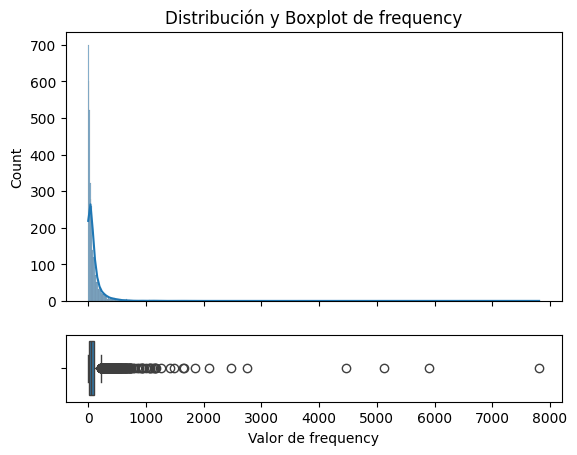

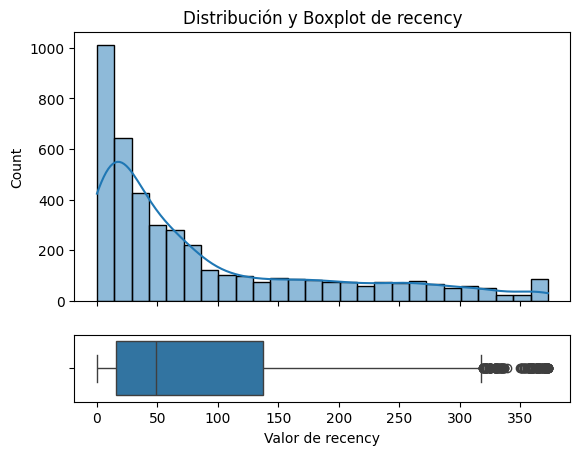

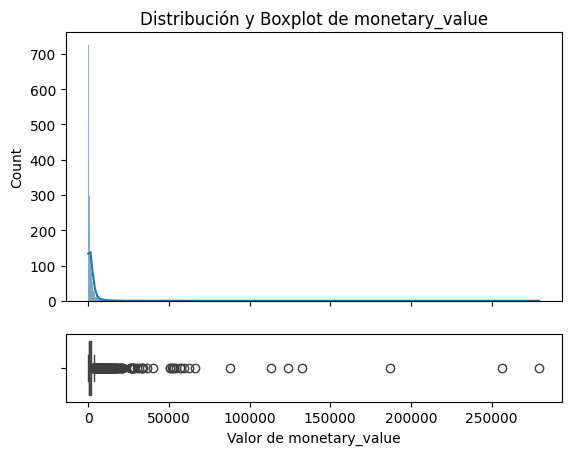

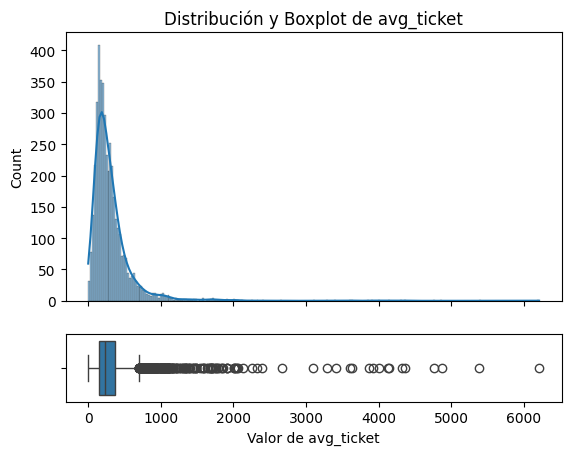

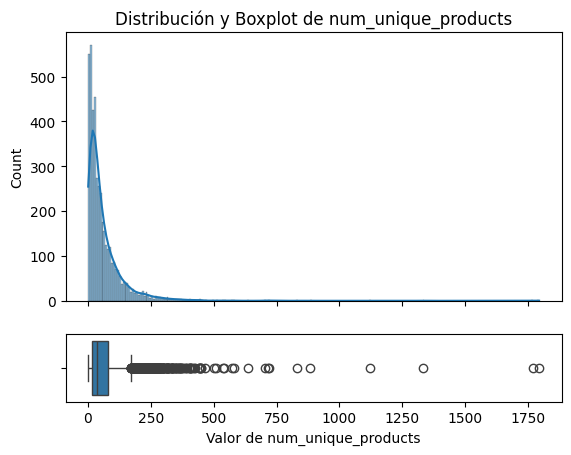

In [24]:
for col in df_rfm.columns:
    # Crear una figura y un conjunto de subplots con 2 filas y 1 columna
    # gridspec_kw controla la proporción de altura entre los plots
    f, (ax_hist, ax_box) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.8, .2)})

    # Plot del histograma en el subplot superior (ax_hist)
    sns.histplot(df_rfm[col], ax=ax_hist, kde=True)
    ax_hist.set_title(f'Distribución y Boxplot de {col}')
    ax_hist.set_xlabel('') # Ocultar el label del eje x para el histograma

    # Plot del boxplot en el subplot inferior (ax_box)
    sns.boxplot(x=df_rfm[col], ax=ax_box)
    ax_box.set_xlabel(f'Valor de {col}')

    # Mostrar el gráfico
    plt.show()


# correlation

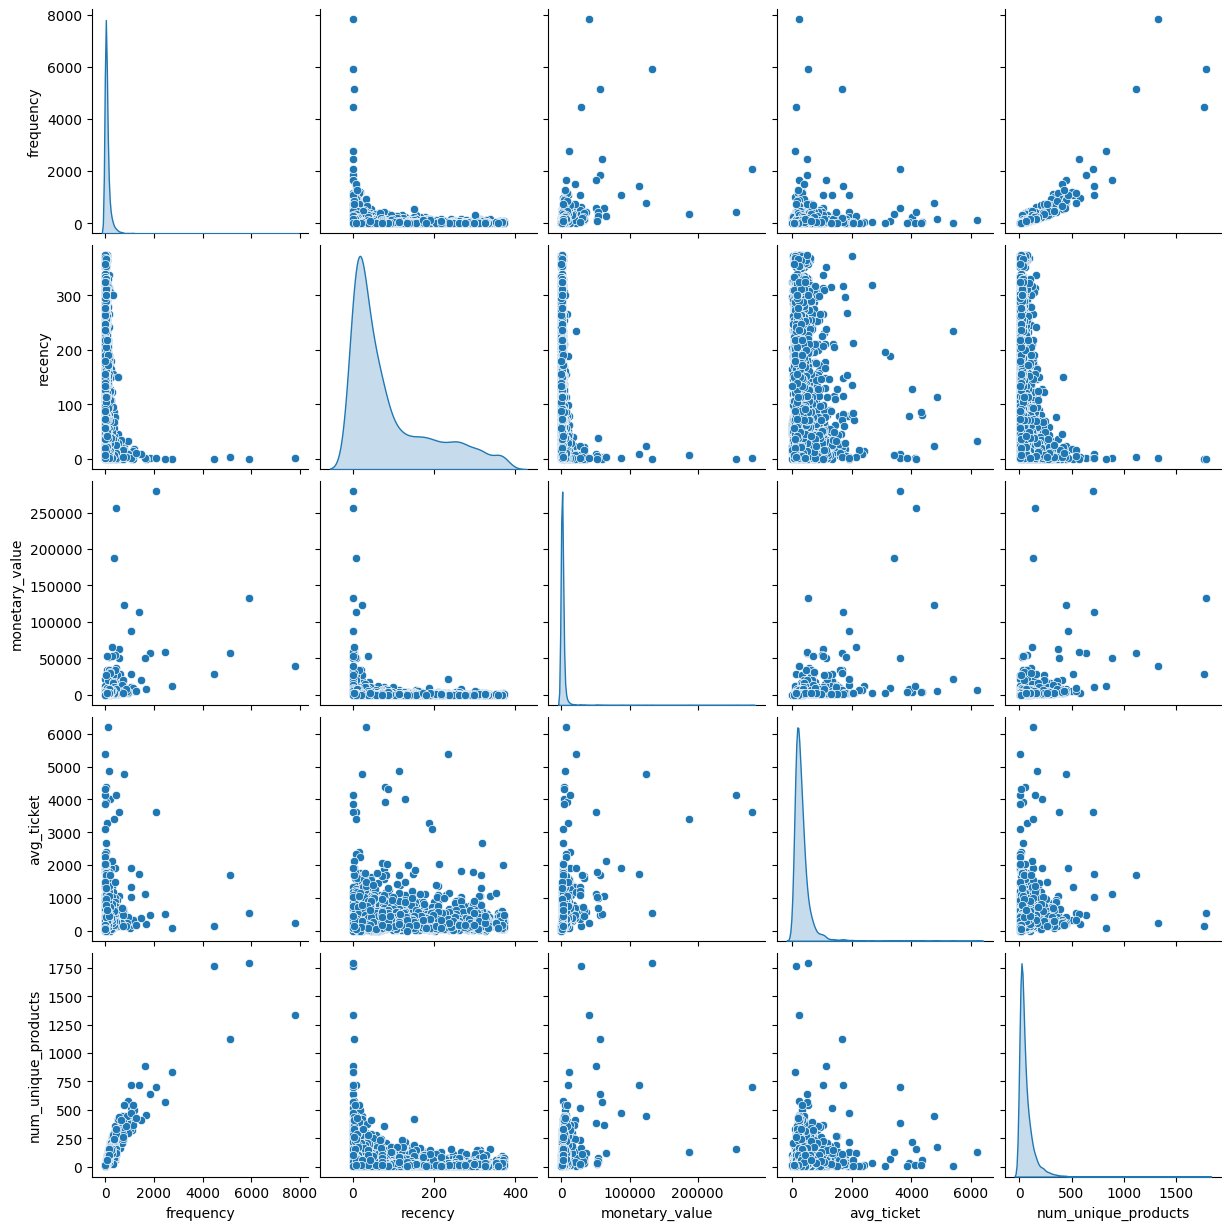

In [25]:
# pairplot
sns.pairplot(df_rfm, diag_kind='kde', markers='o')



In [26]:
# save the dataframe to a csv file
df_rfm.to_csv('../Data/Clean/df_rfm_without_transformation.csv', index=False)

# transformación

frecuencia: usaremos una transformacion de raiz cuadrada para reducir el impacto de los outliers.

recency: no es necesario aplicar transformacion, ya que no tienen outliers.

monetary value: usaremos una transformacion logaritmica para reducir el impacto de los outliers.

avg ticket: usaremos el rango intercuartil para eliminar los outliers.

numero de productos: usaremos una transformacion de raiz cuadrada para reducir el impacto de los outliers.


In [27]:
# frecuencia: transformar a raiz cuadrada
df_rfm["frequency"] = df_rfm["frequency"].apply(lambda x: x**0.4)
# recency: nada
# monetary_value: transformar a logaritmo
df_rfm["monetary_value"] = df_rfm["monetary_value"].apply(lambda x: -(-x)**0.2 if x <= 0 else x**0.2)
# avg_ticket: transformar a logaritmo
df_rfm["avg_ticket"] = df_rfm["avg_ticket"].apply(lambda x: -(-x)**0.4 if x <= 0 else x**0.4)
# num_unique_products: nada
df_rfm["num_unique_products"] = df_rfm["num_unique_products"].apply(lambda x: x**0.4)

df_rfm

,frequency,recency,monetary_value,avg_ticket,num_unique_products
CustomerID,,,,,
12346.0,1.319508,325,-0.000000,-0.000000,1.000000
12347.0,8.017308,1,5.332065,13.054243,6.384618
12348.0,3.949523,74,4.476321,11.508492,3.443254
12349.0,5.563257,18,4.456373,19.859261,5.563257
12350.0,3.105844,309,3.197814,10.226017,3.105844
...,...,...,...,...,...
18280.0,2.511886,277,2.827115,7.992582,2.511886
18281.0,2.177906,180,2.407153,5.794388,2.177906
18282.0,2.789827,7,2.814480,5.104436,2.701920


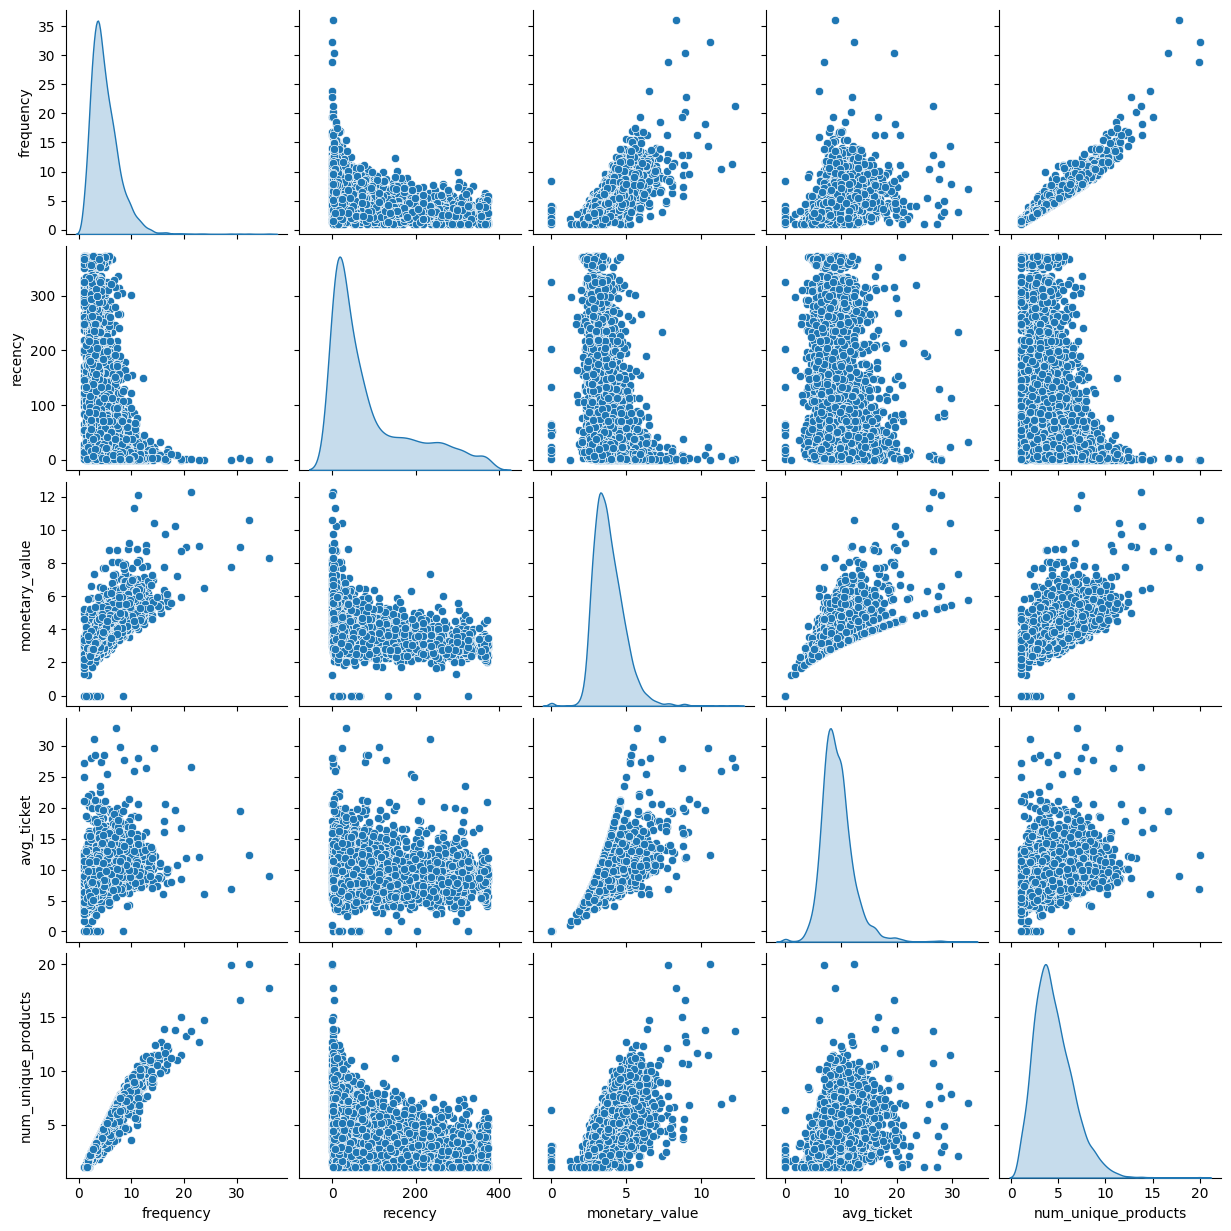

In [28]:
# pairplot
sns.pairplot(df_rfm, diag_kind='kde', markers='o')

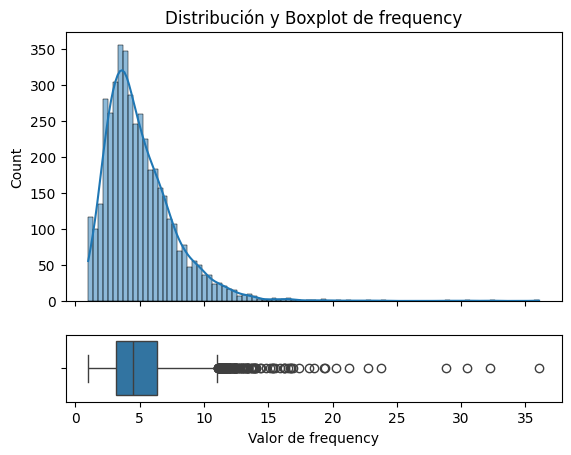

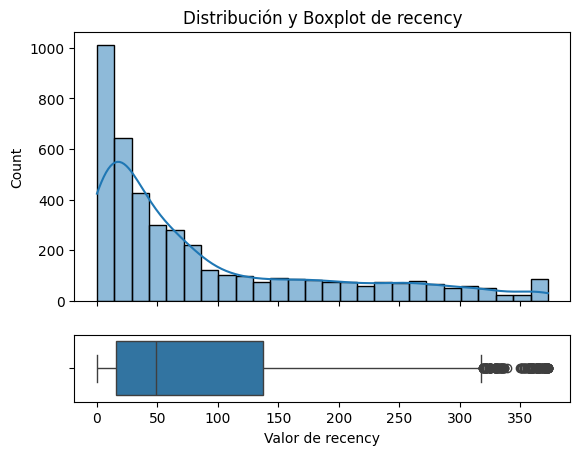

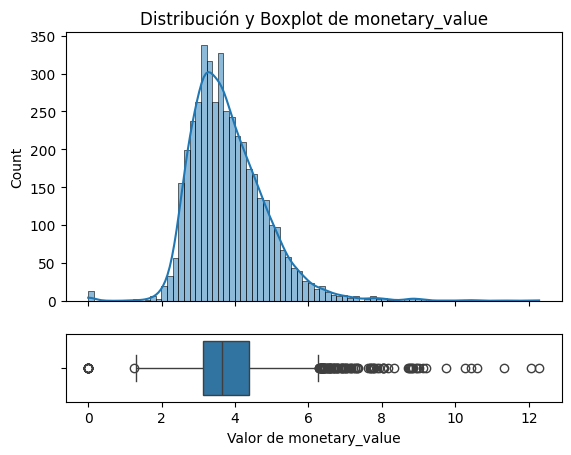

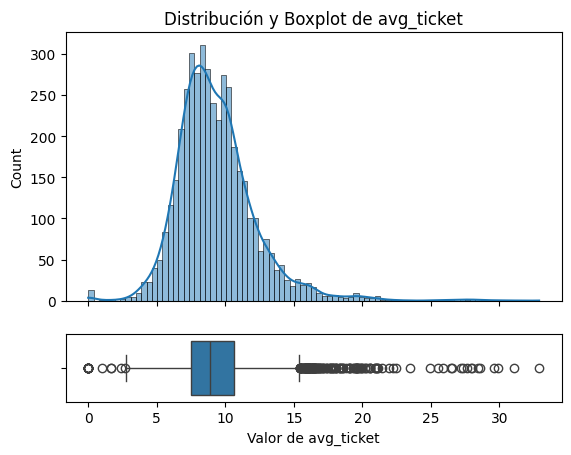

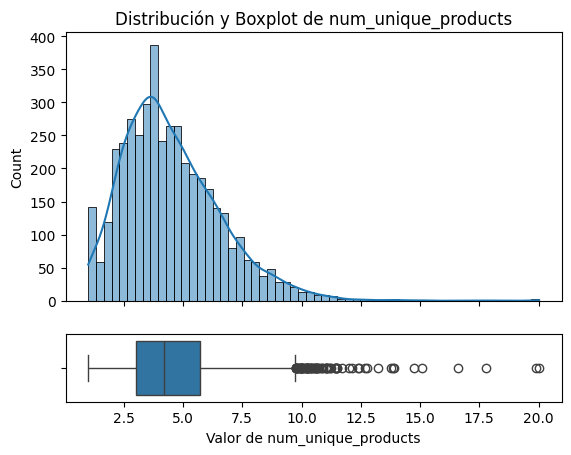

In [29]:
for col in df_rfm.columns:
    # Crear una figura y un conjunto de subplots con 2 filas y 1 columna
    # gridspec_kw controla la proporción de altura entre los plots
    f, (ax_hist, ax_box) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.8, .2)})

    # Plot del histograma en el subplot superior (ax_hist)
    sns.histplot(df_rfm[col], ax=ax_hist, kde=True)
    ax_hist.set_title(f'Distribución y Boxplot de {col}')
    ax_hist.set_xlabel('') # Ocultar el label del eje x para el histograma

    # Plot del boxplot en el subplot inferior (ax_box)
    sns.boxplot(x=df_rfm[col], ax=ax_box)
    ax_box.set_xlabel(f'Valor de {col}')

    # Mostrar el gráfico
    plt.show()

# estandarización

In [30]:
df_rfm_estandar = df_rfm.copy()
df_rfm_estandar = (df_rfm_estandar - df_rfm_estandar.mean()) / df_rfm_estandar.std()
df_rfm_estandar

,frequency,recency,monetary_value,avg_ticket,num_unique_products
CustomerID,,,,,
12346.0,-1.350976,2.377321,-3.641547,-3.159587,-1.685867
12347.0,1.091181,-0.891276,1.431830,1.256260,0.896262
12348.0,-0.392018,-0.154833,0.617603,0.733380,-0.514234
12349.0,0.196383,-0.719775,0.598623,3.558188,0.502388
12350.0,-0.699641,2.215909,-0.598876,0.299559,-0.676035
...,...,...,...,...,...
18280.0,-0.916210,1.893085,-0.951591,-0.455943,-0.960860
18281.0,-1.037986,0.914523,-1.351178,-1.199525,-1.121016
18282.0,-0.814867,-0.830746,-0.963613,-1.432914,-0.869732


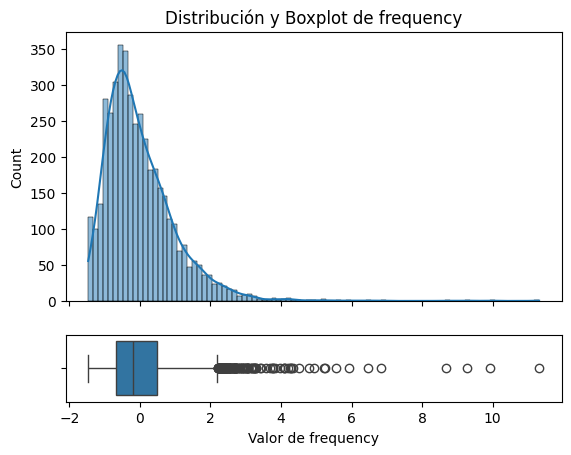

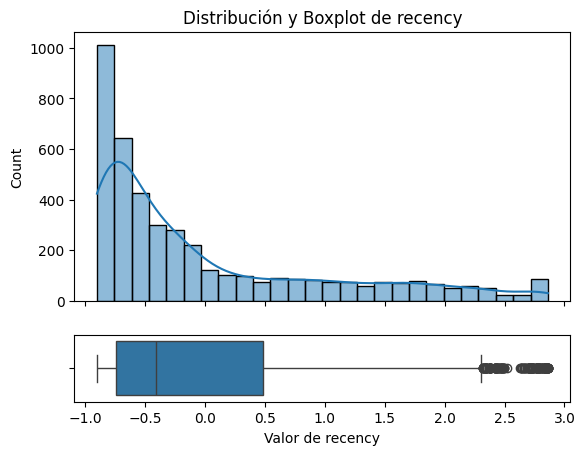

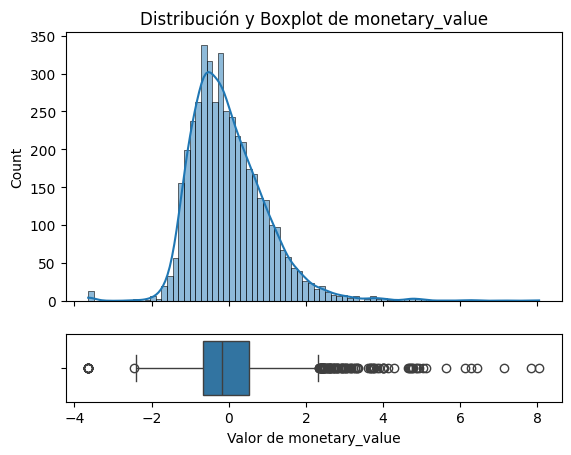

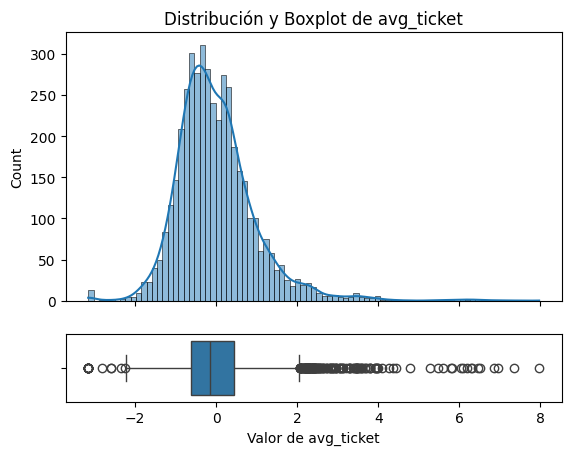

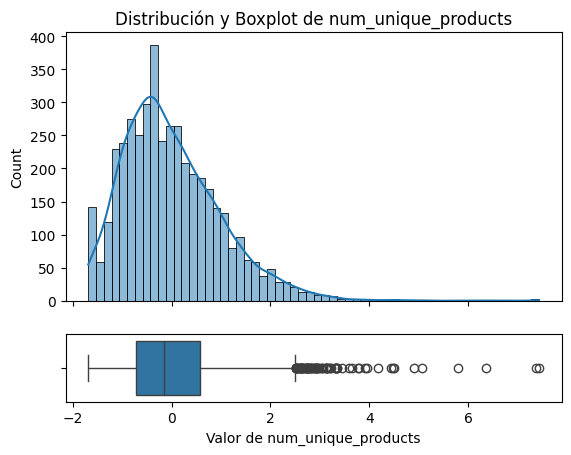

In [31]:
for col in df_rfm_estandar.columns:
    # Crear una figura y un conjunto de subplots con 2 filas y 1 columna
    # gridspec_kw controla la proporción de altura entre los plots
    f, (ax_hist, ax_box) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.8, .2)})

    # Plot del histograma en el subplot superior (ax_hist)
    sns.histplot(df_rfm_estandar[col], ax=ax_hist, kde=True)
    ax_hist.set_title(f'Distribución y Boxplot de {col}')
    ax_hist.set_xlabel('') # Ocultar el label del eje x para el histograma

    # Plot del boxplot en el subplot inferior (ax_box)
    sns.boxplot(x=df_rfm_estandar[col], ax=ax_box)
    ax_box.set_xlabel(f'Valor de {col}')

    # Mostrar el gráfico
    plt.show()

# Dimensionality reduction

## PCA

In [32]:
df_rfm_estandar

,frequency,recency,monetary_value,avg_ticket,num_unique_products
CustomerID,,,,,
12346.0,-1.350976,2.377321,-3.641547,-3.159587,-1.685867
12347.0,1.091181,-0.891276,1.431830,1.256260,0.896262
12348.0,-0.392018,-0.154833,0.617603,0.733380,-0.514234
12349.0,0.196383,-0.719775,0.598623,3.558188,0.502388
12350.0,-0.699641,2.215909,-0.598876,0.299559,-0.676035
...,...,...,...,...,...
18280.0,-0.916210,1.893085,-0.951591,-0.455943,-0.960860
18281.0,-1.037986,0.914523,-1.351178,-1.199525,-1.121016
18282.0,-0.814867,-0.830746,-0.963613,-1.432914,-0.869732


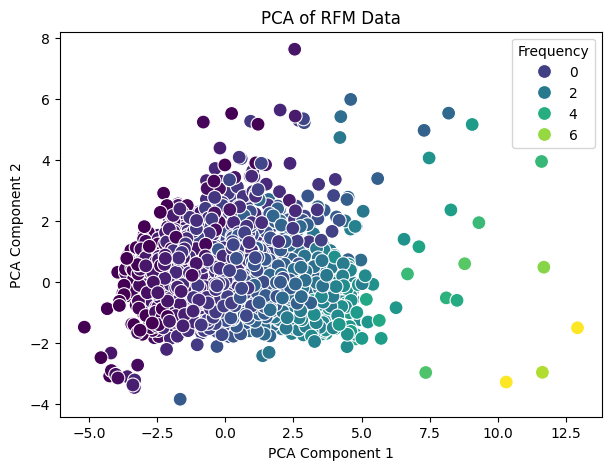

In [33]:
df_rfm_estandar_pca = df_rfm_estandar.copy()
pca = PCA(n_components=2)
df_rfm_estandar_pca[['pca1', 'pca2']] = pca.fit_transform(df_rfm_estandar_pca)
fig = plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_rfm_estandar_pca, x='pca1', y='pca2', hue='num_unique_products', palette='viridis', s=100)
plt.title('PCA of RFM Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Frequency')
plt.show()

In [34]:
df_rfm_estandar

,frequency,recency,monetary_value,avg_ticket,num_unique_products
CustomerID,,,,,
12346.0,-1.350976,2.377321,-3.641547,-3.159587,-1.685867
12347.0,1.091181,-0.891276,1.431830,1.256260,0.896262
12348.0,-0.392018,-0.154833,0.617603,0.733380,-0.514234
12349.0,0.196383,-0.719775,0.598623,3.558188,0.502388
12350.0,-0.699641,2.215909,-0.598876,0.299559,-0.676035
...,...,...,...,...,...
18280.0,-0.916210,1.893085,-0.951591,-0.455943,-0.960860
18281.0,-1.037986,0.914523,-1.351178,-1.199525,-1.121016
18282.0,-0.814867,-0.830746,-0.963613,-1.432914,-0.869732


In [35]:
df_rfm_estandar_pca = df_rfm_estandar.copy()
pca = PCA(n_components=3)
# Añadimos las columnas originales para poder usarlas en el gráfico
df_rfm_estandar_pca[['pca1', 'pca2', 'pca3']] = pca.fit_transform(df_rfm_estandar_pca)

print("Explained variance ratio (total) for PCA components:")
print(pca.explained_variance_ratio_.sum())

Explained variance ratio (total) for PCA components:
0.9538998118842882


In [36]:
df_rfm_estandar

,frequency,recency,monetary_value,avg_ticket,num_unique_products
CustomerID,,,,,
12346.0,-1.350976,2.377321,-3.641547,-3.159587,-1.685867
12347.0,1.091181,-0.891276,1.431830,1.256260,0.896262
12348.0,-0.392018,-0.154833,0.617603,0.733380,-0.514234
12349.0,0.196383,-0.719775,0.598623,3.558188,0.502388
12350.0,-0.699641,2.215909,-0.598876,0.299559,-0.676035
...,...,...,...,...,...
18280.0,-0.916210,1.893085,-0.951591,-0.455943,-0.960860
18281.0,-1.037986,0.914523,-1.351178,-1.199525,-1.121016
18282.0,-0.814867,-0.830746,-0.963613,-1.432914,-0.869732


In [37]:
fig = px.scatter_3d(
    df_rfm_estandar_pca,
    x='pca1',
    y='pca2',
    z='pca3',
    color='num_unique_products',  # MODIFICAR ESTO según el nombre de las columnas de df_rfm_estandar
    title='PCA de Datos RFM',
    labels={'pca1': 'PCA 1', 'pca2': 'PCA 2', 'pca3': 'PCA 3'}
)

fig.show()

# Saving Data

In [38]:
df_rfm_estandar.to_csv('../Data/Clean/df_rfm_estandar.csv', index=False)
df_rfm_estandar_pca.to_csv('../Data/Clean/df_rfm_estandar_pca.csv', index=False)